# Customer LifeTime Value (CLV)

### Load Data 

In [8]:
import pandas as pd
data=pd.read_excel("Online Retail.xlsx")
data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Information 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
data.isnull().sum() # mising value 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Pre-processing

In [11]:
newdf = data.drop_duplicates() # removing duplicates 

In [12]:
newdf.info() # new data,  after remove the duplicates 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [13]:
# removing null values 
newdf = newdf.dropna()

In [14]:
newdf.isnull().any() # checking wheather null is there or not 

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [15]:
newdf.describe() #  statistical approch of numeric data

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
# Here, you can observe some of the customers have ordered in a negative quantity,
#  which is not possible.  So, need to filter Quantity greater than zero. 

In [17]:
# filter the quantity data
data = newdf[(newdf['Quantity']>0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


###  Filter Features for calculate CLV

Here, you can filter the necessary columns for calculating CLTV. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

CustomerID will uniquely define your customers.


InvoiceDate help you calculate numbers of days customer stayed with your product.

InvoiceNo helps you to count the number of time transaction performed(frequency)

Quantity is purchased item units in each transaction

UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [18]:
fdata=data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [19]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [20]:
#Calulate total price - using unit price and quantity 
fdata['TotalPrice'] = fdata['Quantity'] * fdata['UnitPrice']

<ipython-input-20-ae95ab668d99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['TotalPrice'] = fdata['Quantity'] * fdata['UnitPrice']


In [21]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


Calculate following to find clv 

Calculate the number of days between the present date and the date of last purchase from each customer.

Calculate the number of orders for each customer.

Calculate sum of purchase price for each customer.

In [22]:
data_group=fdata.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPrice': lambda price: price.sum()})

In [23]:
data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPrice
CustomerID,,,,
12346.0,0,1,74215,77183.60
12347.0,365,182,2458,4310.00
12348.0,282,31,2341,1797.24
12349.0,0,73,631,1757.55
12350.0,0,17,197,334.40


In [24]:
# Change the name of columns
data_group.columns=['no_days','no_transactions','no_units','spent_money']
data_group.head()

,no_days,no_transactions,no_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12347.0,365,182,2458,4310.00
12348.0,282,31,2341,1797.24
12349.0,0,73,631,1757.55
12350.0,0,17,197,334.40


# Calculate LifeTime Value (CLV)

In [25]:
# The following formulae is used for calculating customer lifetime value 

# CLV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

#  Customer Value = Average Order Value * Purchase Frequency

###  Calculate Average Order Value

In [26]:
# Average Order Value
data_group['avg_order_value']=data_group['spent_money']/data_group['no_transactions']

In [27]:
data_group.head()

,no_days,no_transactions,no_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12347.0,365,182,2458,4310.00,23.681319
12348.0,282,31,2341,1797.24,57.975484
12349.0,0,73,631,1757.55,24.076027
12350.0,0,17,197,334.40,19.670588


### Calculate Purchase Frequency

In [28]:
#number of customer divided by  total number of customer 

In [29]:
purchase_frequency=sum(data_group['no_transactions'])/data_group.shape[0]

In [30]:
purchase_frequency

90.51209956211109

### Calculate Repeat Rate and Churn Rate

In [31]:
# Repeat Rate
repeat_rate=data_group[data_group.no_transactions > 1].shape[0]/data_group.shape[0]

In [32]:
repeat_rate

0.9834063148190827

In [33]:
#Churn Rate
churn_rate=1-repeat_rate

In [34]:
churn_rate

0.016593685180917306

### Calculate Profit Margin

Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. 

In [35]:
# Profit Margin
data_group['profit_margin']=data_group['spent_money']*0.05 # 0.05 is assume value, because we dont know the margin

In [36]:
data_group.head()

,no_days,no_transactions,no_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12347.0,365,182,2458,4310.00,23.681319,215.5000
12348.0,282,31,2341,1797.24,57.975484,89.8620
12349.0,0,73,631,1757.55,24.076027,87.8775
12350.0,0,17,197,334.40,19.670588,16.7200


### Calcualte Customer Lifetime Value

In [37]:
# Customer Value
data_group['CLV']=(data_group['avg_order_value']*purchase_frequency)/churn_rate

In [38]:
#Customer Lifetime Value
data_group['cust_lifetime_value']=data_group['CLV']*data_group['profit_margin']

In [39]:
data_group.head()

,no_days,no_transactions,no_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,4.210065e+08,1.624740e+12
12347.0,365,182,2458,4310.00,23.681319,215.5000,1.291724e+05,2.783665e+07
12348.0,282,31,2341,1797.24,57.975484,89.8620,3.162337e+05,2.841739e+07
12349.0,0,73,631,1757.55,24.076027,87.8775,1.313254e+05,1.154054e+07
12350.0,0,17,197,334.40,19.670588,16.7200,1.072954e+05,1.793979e+06


# Predict CLTV using Linear Regression 

In [40]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [41]:
#fdata['month_year'] = fdata['InvoiceDate'].dt.to_period('M') # extract month and year 

In [42]:
fdata['month_yr'] = fdata['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

<ipython-input-42-e053666b1e11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['month_yr'] = fdata['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))


In [43]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [44]:
fdata["month_yr"].unique()

array(['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011',
       'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011',
       'Oct-2011', 'Nov-2011', 'Dec-2011'], dtype=object)

The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.

In [45]:
sales=fdata.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPrice',aggfunc='sum',fill_value=0).reset_index()

In [46]:
sales.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0
1,12347.0,636.25,584.91,711.79,224.82,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0
2,12348.0,367.00,0.00,892.80,0.00,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0
3,12349.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0
4,12350.0,0.00,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0


In [47]:
# Let's sum all the months sales.
sales['CLV']=sales.iloc[:,2:].sum(axis=1)

In [48]:
sales.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,711.79,224.82,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0,3673.75
2,12348.0,367.00,0.00,892.80,0.00,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0,1430.24
3,12349.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,334.40


In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Apr-2011    4339 non-null   float64
 2   Aug-2011    4339 non-null   float64
 3   Dec-2010    4339 non-null   float64
 4   Dec-2011    4339 non-null   float64
 5   Feb-2011    4339 non-null   float64
 6   Jan-2011    4339 non-null   float64
 7   Jul-2011    4339 non-null   float64
 8   Jun-2011    4339 non-null   float64
 9   Mar-2011    4339 non-null   float64
 10  May-2011    4339 non-null   float64
 11  Nov-2011    4339 non-null   float64
 12  Oct-2011    4339 non-null   float64
 13  Sep-2011    4339 non-null   float64
 14  CLV         4339 non-null   float64
dtypes: float64(15)
memory usage: 508.6 KB


In [50]:
sales.columns

Index(['CustomerID', 'Apr-2011', 'Aug-2011', 'Dec-2010', 'Dec-2011',
       'Feb-2011', 'Jan-2011', 'Jul-2011', 'Jun-2011', 'Mar-2011', 'May-2011',
       'Nov-2011', 'Oct-2011', 'Sep-2011', 'CLV'],
      dtype='object', name='month_yr')

In [51]:
X=sales[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]# imagine if we have only six month of data 
y=sales[['CLV']]

###  Splitting Data

In [52]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### Linear Regression

In [53]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [54]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[70.45618465]
[[1.00813952 1.0777134  1.92632911 1.33275221 2.82694179 2.05933629]]


### Model Evaluation

In [55]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.7324809573248418


In [56]:
# calculate MAE using scikit-learn
import numpy as np
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 682.826508777692
MSE 5859263.624523391
RMSE: 2420.591585650787


# RFM Analysis 

In [57]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [59]:
fdata["InvoiceDate"].max() 
# getting maximum date for finding recent date of purchase to calculate recency value 


Timestamp('2011-12-09 12:50:00')

In [60]:
fdata["InvoiceDate"].min()
# getting minimum date for finding starting date of purchase to calculate recency value 

Timestamp('2010-12-01 08:26:00')

In [62]:
fdata.shape

(392732, 7)

In [63]:
fdata["InvoiceDate"].value_counts()

2011-11-14 15:27:00    542
2011-11-28 15:54:00    533
2011-12-05 17:17:00    529
2011-11-23 13:39:00    443
2011-10-31 14:09:00    435
                      ... 
2011-09-27 09:46:00      1
2011-11-17 12:19:00      1
2011-01-21 14:51:00      1
2011-08-26 14:20:00      1
2011-05-06 11:51:00      1
Name: InvoiceDate, Length: 17286, dtype: int64

In [64]:
# import datetime
from datetime import timedelta
from datetime import datetime, timedelta
recent = (fdata["InvoiceDate"].max()) + timedelta(days=1)
print(recent)

2011-12-10 12:50:00


In [65]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [67]:
## groupy the customer to find the RFM value 
RFM = fdata.groupby(["CustomerID"]).agg ({
 "InvoiceDate": lambda x:(recent-x.max()).days , # invoice data for recency 
    "InvoiceNo" : "count", # invoice no for calculating frequency 
    "TotalPrice" : "sum" # total price for monetary 
    
})

RFM.rename(columns={"InvoiceDate": "recency","InvoiceNo":"frequency","TotalPrice":"monetary"},inplace=True)
display(RFM)

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [68]:
# creat R F M value with desire ranging
Rlabel=range(4,0,-1)
Flabel=range(1,5)
Mlabel=range(1,5)

rgroup=pd.qcut(RFM["recency"],q=4,labels=Rlabel)

fgroup=pd.qcut(RFM["frequency"],q=4,labels=Rlabel)

mgroup=pd.qcut(RFM["monetary"],q=4,labels=Rlabel)

RFM["R"] = rgroup.values
RFM["F"] = fgroup.values
RFM["M"] = mgroup.values

display(RFM.tail(15))

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
18265.0,72,46,801.51,2,2,2
18268.0,134,1,25.50,2,4,4
18269.0,366,7,168.60,1,4,4
18270.0,38,11,283.15,3,4,4
18272.0,3,166,3078.58,4,1,1
18273.0,2,3,204.00,4,4,4
18274.0,30,11,175.92,3,4,4
18276.0,44,14,335.86,3,4,3
18277.0,58,8,110.38,2,4,4


In [69]:
# comine R,F,M , 
RFM["rfm_value"]=RFM.apply(lambda x: str(x["R"]) + str(x["F"]) + str(x["M"]), axis= 1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0
12347.0,2,182,4310.00,4,1,1,4.01.01.0
12348.0,75,31,1797.24,2,3,1,2.03.01.0
12349.0,19,73,1757.55,3,2,1,3.02.01.0
12350.0,310,17,334.40,1,4,3,1.04.03.0


In [70]:
# creating RFM score for customer segmentation
RFM["Score"]= RFM[["R","F","M"]].sum(axis=1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value,Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0,6.0
12347.0,2,182,4310.00,4,1,1,4.01.01.0,6.0
12348.0,75,31,1797.24,2,3,1,2.03.01.0,6.0
12349.0,19,73,1757.55,3,2,1,3.02.01.0,6.0
12350.0,310,17,334.40,1,4,3,1.04.03.0,8.0


In [71]:
print("max score :",RFM["Score"].max())
print("mix score :",RFM["Score"].min())

max score : 12.0
mix score : 3.0


In [72]:
# customer segmentation
def rfm_status(df):
    if(df["Score"]<=5 ):
        return "Platinum"
    elif(df["Score"]>=6) and (df["Score"]<=8):return "Gold"
    elif(df["Score"]>=9) and (df["Score"]<=12):return "Silver"

    
    else: return "requires activation"
    

In [73]:
RFM["RFM_status"]= RFM.apply(rfm_status,axis=1)
display(RFM.head(10))

,recency,frequency,monetary,R,F,M,rfm_value,Score,RFM_status
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0,6.0,Gold
12347.0,2,182,4310.00,4,1,1,4.01.01.0,6.0,Gold
12348.0,75,31,1797.24,2,3,1,2.03.01.0,6.0,Gold
12349.0,19,73,1757.55,3,2,1,3.02.01.0,6.0,Gold
12350.0,310,17,334.40,1,4,3,1.04.03.0,8.0,Gold
12352.0,36,85,2506.04,3,2,1,3.02.01.0,6.0,Gold
12353.0,204,4,89.00,1,4,4,1.04.04.0,9.0,Silver
12354.0,232,58,1079.40,1,2,2,1.02.02.0,5.0,Platinum
12355.0,214,13,459.40,1,4,3,1.04.03.0,8.0,Gold


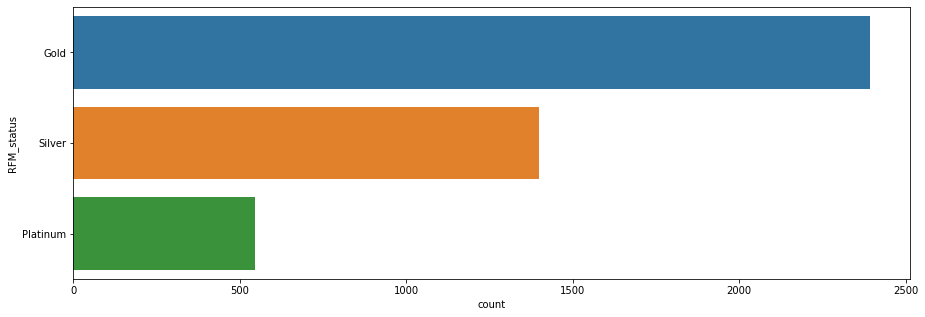

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y="RFM_status",data=RFM)
plt.show()